In [1]:
# Lodz University of Technology
# 2022-23 Image Processing Assignment 3
# @Ahmet Galip Sengun - 904261
# October 2022

import skimage
import numpy as np
import matplotlib.pyplot as plt

# Task 1

## A

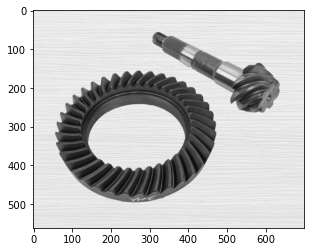

In [2]:
gear = skimage.io.imread("gears1.png")
plt.imshow(gear, cmap="gray")

## B 

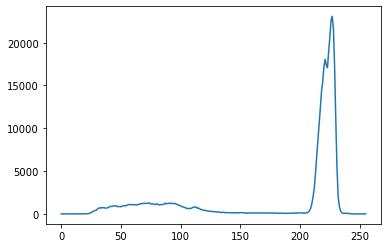

In [3]:
values, pixels = np.histogram(gear, bins=range(0,257))
plt.plot(pixels[:-1], values)

## C

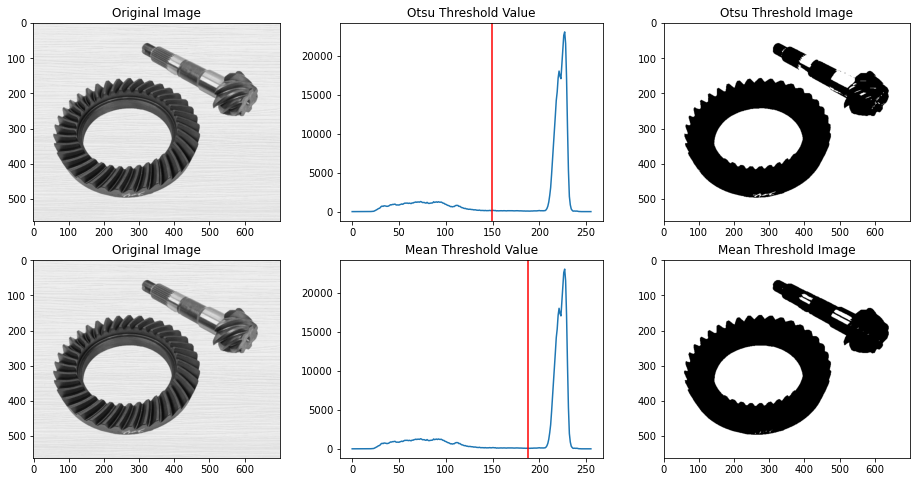

In [4]:
from skimage.filters import threshold_otsu

fig, ax = plt.subplots(2, 3, figsize = (16,8))

ax[0, 0].set_title("Original Image")
ax[0, 0].imshow(gear, cmap="gray")

otsu_thresh = threshold_otsu(gear)
otsu_binary = gear > otsu_thresh

ax[0, 1].set_title("Otsu Threshold Value")
ax[0, 1].plot(pixels[:-1], values)
ax[0, 1].axvline(otsu_thresh, color='r')

ax[0, 2].set_title("Otsu Threshold Image")
ax[0, 2].imshow(otsu_binary, cmap= "gray")

ax[1, 0].set_title("Original Image")
ax[1, 0].imshow(gear, cmap="gray")

mean_thresh = np.mean(gear)
mean_binary = gear > mean_thresh


ax[1, 1].set_title("Mean Threshold Value")
ax[1, 1].plot(pixels[:-1], values)
ax[1, 1].axvline(mean_thresh, color='r')

ax[1, 2].set_title("Mean Threshold Image")
ax[1, 2].imshow(mean_binary, cmap= "gray")

# Task 2

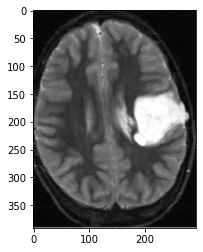

In [5]:
brain_tumor = skimage.io.imread("brain_tumor.png")
plt.imshow(brain_tumor, cmap="gray")

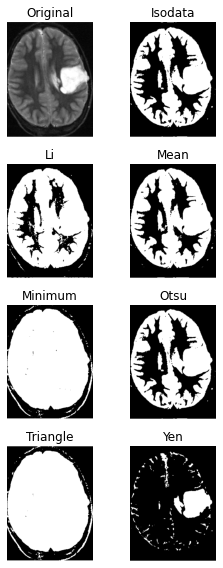

In [6]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(brain_tumor, figsize=(4, 8), verbose=False)
plt.show()

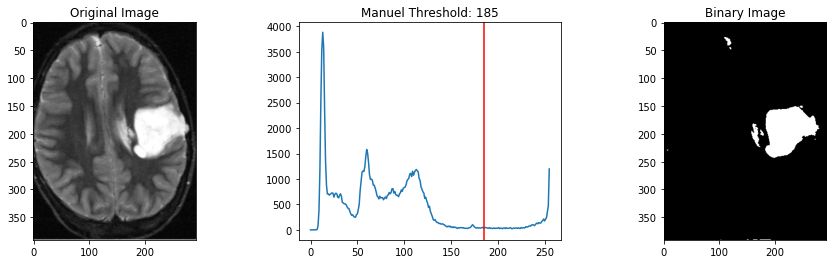

In [7]:
fig, ax = plt.subplots(1, 3, figsize = (16,4))

ax[0].set_title("Original Image")
ax[0].imshow(brain_tumor, cmap="gray")

thresh = 185
binary = brain_tumor > thresh

values, pixels = np.histogram(brain_tumor, bins=range(0,257))
ax[1].plot(pixels[:-1], values)
ax[1].axvline(thresh, color='r')
ax[1].set_title(f"Manuel Threshold: {thresh}")

ax[2].set_title("Binary Image")
ax[2].imshow(binary, cmap= "gray")

# Task 3

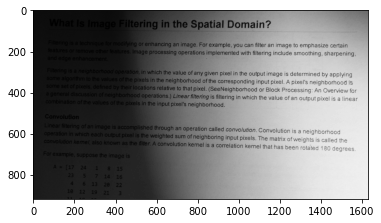

In [8]:
printed_text = skimage.io.imread("printed_text.png")
plt.imshow(printed_text, cmap="gray")

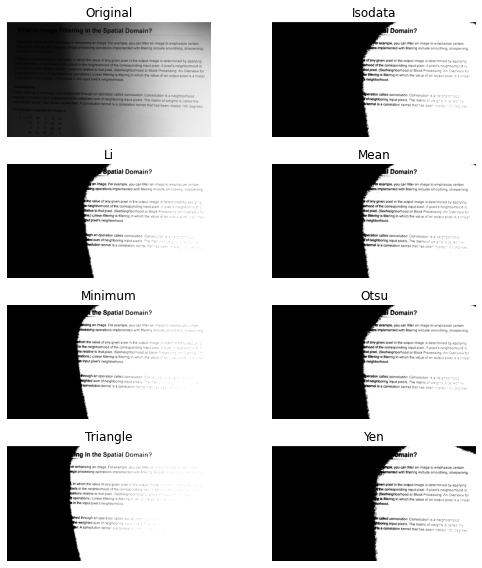

In [9]:
fig, ax = try_all_threshold(printed_text, figsize=(8, 8), verbose=False)
plt.show()

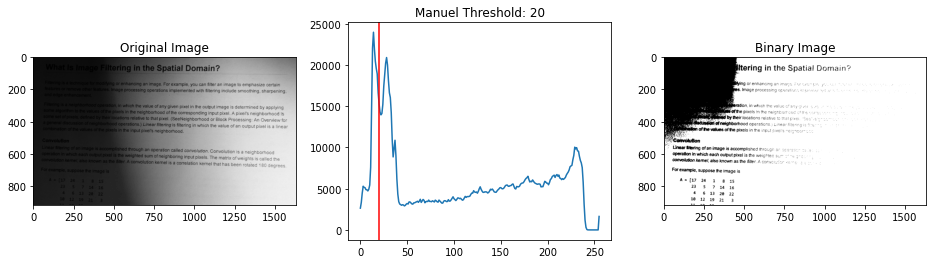

In [10]:
fig, ax = plt.subplots(1, 3, figsize = (16,4))

ax[0].set_title("Original Image")
ax[0].imshow(printed_text, cmap="gray")

thresh = 20
binary = printed_text > thresh

values, pixels = np.histogram(printed_text, bins=range(0,257))
ax[1].plot(pixels[:-1], values)
ax[1].axvline(thresh, color='r')
ax[1].set_title(f"Manuel Threshold: {thresh}")

ax[2].set_title("Binary Image")
ax[2].imshow(binary, cmap= "gray")

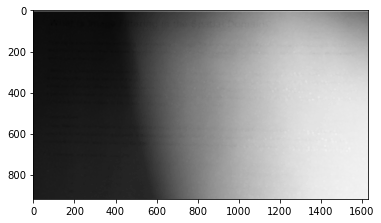

In [11]:
from skimage.filters.rank import maximum
from skimage.morphology import disk, ball

rng = np.random.default_rng()
bg = maximum(printed_text, disk(5))

plt.imshow(bg, cmap = "gray")

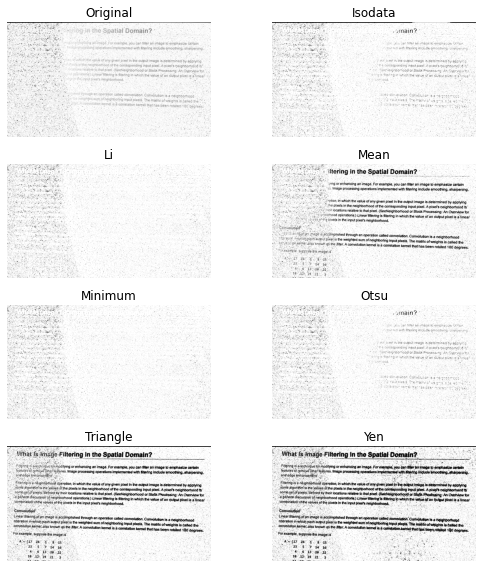

In [12]:
img2 = printed_text - bg
fig, ax = try_all_threshold(img2, figsize=(8, 8), verbose=False)
plt.show()

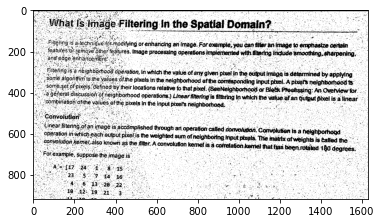

In [13]:
thresh = 247
binary = img2 > thresh
plt.imshow(binary, cmap= "gray")

# Task 4

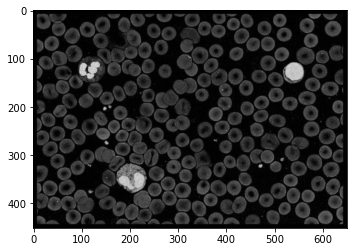

In [14]:
from skimage.color import rgb2gray
blood_smear = -rgb2gray(skimage.io.imread("blood_smear.jpg"))
blood_smear *= 255
blood_smear = blood_smear.astype(np.uint8)

plt.imshow(blood_smear, cmap="gray")

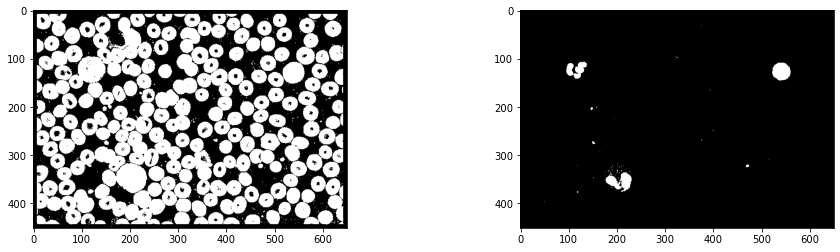

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (16,4))

t1 = 15
img1 = (blood_smear > t1) * 1
img1 *= 255
img1 = img1.astype(np.uint8)
ax[0].imshow(img1, cmap= "gray")

t2 = 140
img2 = (blood_smear > t2) * 1
img2 *= 255
img2 = img2.astype(np.uint8)
ax[1].imshow(img2, cmap= "gray")

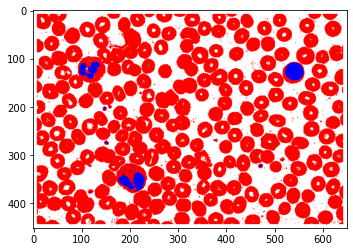

In [16]:
size = [451, 650, 3]
img = np.zeros(size, dtype=np.uint8)
img.fill(255)
img[:,:,1] = img[:,:,1] - img1
img[:,:,2] = img[:,:,2] - img1

img[:,:,0] = img[:,:,0] - img2
img[:,:,1] = img[:,:,1] - img2
img[:,:,2] = img[:,:,2] + img2
plt.imshow(img)

# Task 5

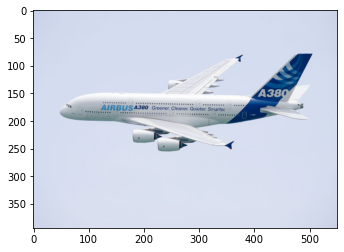

In [17]:
airbus = skimage.io.imread("airbus.png")
plt.imshow(airbus, cmap="gray")

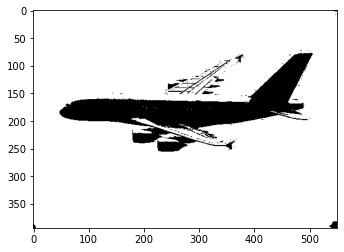

In [18]:
thresh = 230
br = airbus[:,:,0] > thresh
bg = airbus[:,:,1] > thresh 
bb = airbus[:,:,2] > thresh 
binary = br + bg + bb

plt.imshow(binary, cmap="gray")

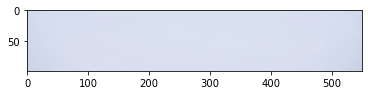

In [19]:
sky = airbus[-100:,:,:]
plt.imshow(sky)

In [20]:
R_mean = np.average(sky[:,:,0])
G_mean = np.average(sky[:,:,1])
B_mean = np.average(sky[:,:,2])
mean_list = [R_mean, G_mean, B_mean]
mean_list

[215.75, 222.29603636363638, 239.03367272727272]

In [21]:
max_dist = 0
for i in range(len(sky)):
        for j in range(len(sky[0])):
            dist = np.linalg.norm(sky[i][j] - mean_list)
            if dist > max_dist: max_dist = dist
max_dist

22.081417908180228

In [26]:
airbus_ = airbus.copy()
for i in range(len(airbus)):
        for j in range(len(airbus[0])):
            dist = np.linalg.norm(airbus[i][j] - mean_list)
            airbus_[i][j] = 1 if dist > max_dist else 0

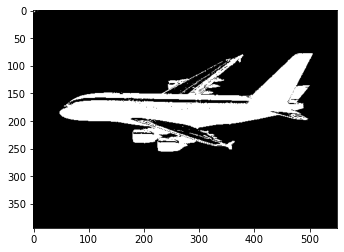

In [27]:
airbus_ *= 255
airbus_ = airbus_.astype(np.uint8)
plt.imshow(airbus_, cmap="gray")